In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath('../..'))

os.makedirs('../source/_static/assets', exist_ok=True)
os.makedirs('../source/_static/img', exist_ok=True)

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
from utils import repr_floats, repr_geometry, repr_short

In [4]:
# # This is to download and save dataset used in tutorial
# import csv
# import io
# import requests

# data_stream = io.BytesIO(requests.get('https://www.dati.salute.gov.it/imgs/C_17_dataset_18_0_upFile.csv').content)

# df = pd.read_csv(data_stream, sep=';', encoding='latin-1', keep_default_na=False)

# rename_columns_dict = {
#     'Anno':'year',
#     'Posti letto degenza ordinaria':'beds',
#     'Sigla provincia':'province_short',
# }

# df = df.rename(columns=rename_columns_dict)
# df = df[df.year == 2019]
# df = df[rename_columns_dict.values()].copy()
# df = df.drop(['year'], axis=1)

# df['beds'] = df.beds.astype(float)


# assert len(df.province_short.unique()) == 107

# df.to_csv('../source/_static/assets/open_data_italy_hospitals_beds_2019.csv', quoting=csv.QUOTE_NONNUMERIC, index=False)

In [5]:
# Source https://www.dati.salute.gov.it/dati/dettaglioDataset.jsp?menu=dati&idPag=18
# License: Italian Open Data Licence v2.0 https://www.dati.gov.it/iodl/2.0/

df = pd.read_csv('../source/_static/assets/open_data_italy_hospitals_beds_2019.csv', dtype={'beds':float, 'province_short':str}, keep_default_na=False)
df.head(10).applymap(repr_short).to_csv('../source/_static/assets/tut_01_table_00.csv')
df.head(10)

,beds,province_short
0,179.0,TO
1,18.0,TO
2,17.0,TO
3,277.0,TO
4,15.0,TO
5,80.0,TO
6,25.0,TO
7,20.0,TO
8,120.0,TO
9,145.0,TO


In [6]:
df = df.groupby(['province_short'], as_index=False).sum()
df.head().applymap(repr_short).to_csv('../source/_static/assets/tut_01_table_01.csv')
df.head()

,province_short,beds
0,AG,751.0
1,AL,1460.0
2,AN,1969.0
3,AO,444.0
4,AP,471.0


In [7]:
from italy_geopop.pandas_extension import pandas_activate
pandas_activate(include_geometry=True)

In [8]:
df[['geometry']] = df.province_short.italy_geopop.from_province(return_cols=['geometry'])
print('df type:', type(df))
df.head().applymap(repr_short).to_csv('../source/_static/assets/tut_01_table_02.csv')
df.head()

df type: <class 'pandas.core.frame.DataFrame'>


,province_short,beds,geometry
0,AG,751.0,"MULTIPOLYGON (((13.66344 37.19338, 13.66536 37..."
1,AL,1460.0,"POLYGON ((8.40875 44.70687, 8.40873 44.70531, ..."
2,AN,1969.0,"POLYGON ((13.42272 43.62050, 13.42110 43.62095..."
3,AO,444.0,"POLYGON ((7.73455 45.92365, 7.73324 45.92345, ..."
4,AP,471.0,"POLYGON ((13.50521 42.77557, 13.50679 42.77631..."


In [9]:
df = gpd.GeoDataFrame(df)

In [10]:
import matplotlib.pyplot as plt

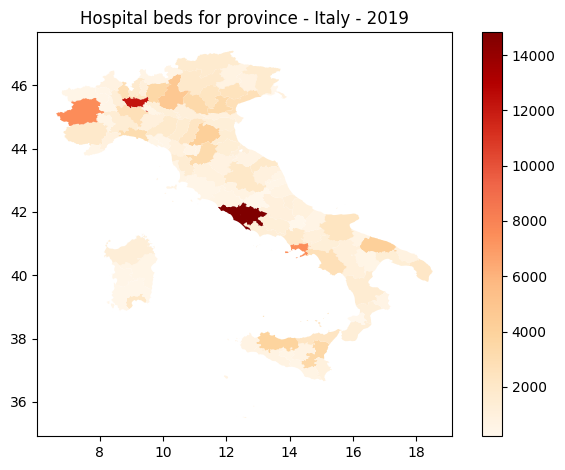

In [11]:
df.plot(
    'beds',
    cmap='OrRd',
    legend=True
)
plt.title('Hospital beds for province - Italy - 2019')
plt.savefig('../source/_static/img/hospital_beds_per_province_2019_italy.png', dpi=200, bbox_inches='tight')
plt.tight_layout()

In [12]:
df['population'] = df.province_short.italy_geopop.from_province(return_cols='population')
df['beds_per_capita'] = df.beds / df.population
df.head().applymap(repr_geometry).applymap(repr_floats).to_csv('../source/_static/assets/tut_01_table_03.csv')
df.head()

,province_short,beds,geometry,population,beds_per_capita
0,AG,751.0,"MULTIPOLYGON (((13.66344 37.19338, 13.66536 37...",415887.0,0.001806
1,AL,1460.0,"POLYGON ((8.40875 44.70687, 8.40873 44.70531, ...",407264.0,0.003585
2,AN,1969.0,"POLYGON ((13.42272 43.62050, 13.42110 43.62095...",461687.0,0.004265
3,AO,444.0,"POLYGON ((7.73455 45.92365, 7.73324 45.92345, ...",123360.0,0.003599
4,AP,471.0,"POLYGON ((13.50521 42.77557, 13.50679 42.77631...",202365.0,0.002327


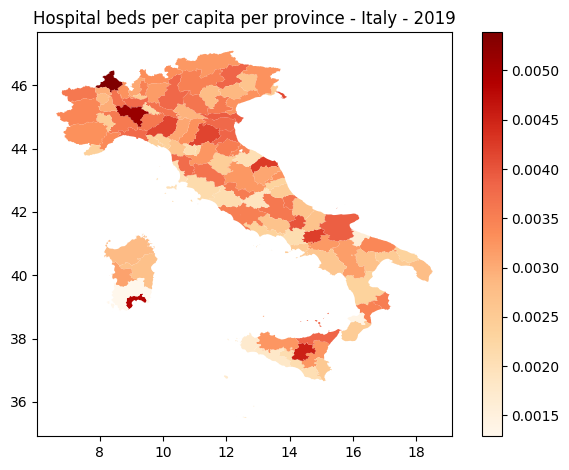

In [13]:
df.plot(
    'beds_per_capita', 
    cmap='OrRd',
    legend=True
)
plt.title('Hospital beds per capita per province - Italy - 2019')
plt.savefig('../source/_static/img/hospital_beds_per_capita_per_province_2019_italy.png', dpi=200, bbox_inches='tight')
plt.tight_layout()

In [14]:
df = pd.read_csv('../source/_static/assets/open_data_italy_hospitals_beds_2019.csv', dtype={'beds':float, 'province_short':str}, keep_default_na=False)

In [15]:
df['region_code'] = df.province_short.italy_geopop.from_province(return_cols='region_code')
df.head().applymap(repr_short).to_csv('../source/_static/assets/tut_01_table_04.csv')
df.head()

,beds,province_short,region_code
0,179.0,TO,1
1,18.0,TO,1
2,17.0,TO,1
3,277.0,TO,1
4,15.0,TO,1


In [16]:
df = df.groupby(['region_code'], as_index=False)[['beds']].sum()
df.head().applymap(repr_short).to_csv('../source/_static/assets/tut_01_table_05.csv')
df.head()

,region_code,beds
0,1,14572.0
1,2,444.0
2,3,34812.0
3,4,3597.0
4,5,15997.0


In [17]:
df[['geometry', 'population']] = df.region_code.italy_geopop.from_region(return_cols=['geometry', 'population'])
df['beds_per_capita'] = df.beds / df.population
df = gpd.GeoDataFrame(df)

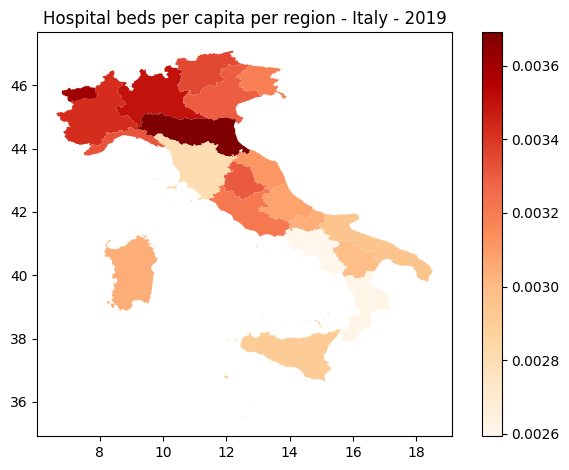

In [18]:
df.plot(
    'beds_per_capita', 
    cmap='OrRd',
    legend=True
)
plt.title('Hospital beds per capita per region - Italy - 2019')
plt.savefig('../source/_static/img/hospital_beds_per_capita_per_region_2019_italy.png', dpi=200, bbox_inches='tight')
plt.tight_layout()